In [1]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt




(tain_imahg,train_label),(test_image,test_labale) = datasets.cifar10.load_data()
print(tain_imahg)

train_images_norm = tain_imahg/255.0
test_images_norm = test_image/255.0

170500096/170498071 [==============================] - 23s 0us/step
[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
 

In [2]:
tain_imahg.shape

(50000, 32, 32, 3)

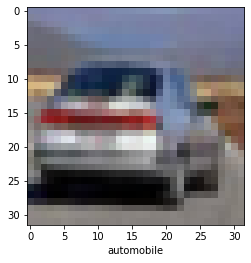

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
IMG_INDEX = 236  # change this to look at other images

plt.imshow(train_images_norm[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_label[IMG_INDEX][0]])
plt.show()


In [5]:
type(train_images_norm)

numpy.ndarray

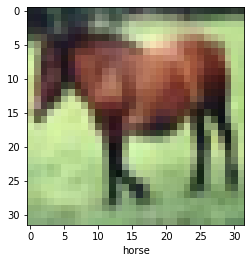

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
IMG_INDEX = 7  # change this to look at other images

plt.imshow(tain_imahg[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_label[IMG_INDEX][0]])
plt.show()

In [4]:
mode1l = models.Sequential()
mode1l.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (32,32,3)))
mode1l.add(layers.MaxPooling2D((2,2)))
mode1l.add(layers.Conv2D(64,(3,3),activation = 'relu'))
mode1l.add(layers.MaxPooling2D((2,2)))
mode1l.add(layers.Conv2D(64,(3,3),activation = 'relu'))


In [5]:
mode1l.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [6]:
mode1l.add(layers.Flatten())
mode1l.add(layers.Dense(64,activation = 'relu'))
mode1l.add(layers.Dense(10))

In [7]:
mode1l.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
hist1ory = mode1l.fit(train_images_norm,train_label,epochs = 10,validation_data=(test_images_norm,test_labale))
    

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 28s 568us/sample - loss: 1.4919 - accuracy: 0.4594 - val_loss: 1.2527 - val_accuracy: 0.5579
Epoch 2/10
50000/50000 [==============================] - 19s 389us/sample - loss: 1.1275 - accuracy: 0.6007 - val_loss: 1.0555 - val_accuracy: 0.6246
Epoch 3/10
50000/50000 [==============================] - 20s 403us/sample - loss: 0.9770 - accuracy: 0.6573 - val_loss: 0.9686 - val_accuracy: 0.6579
Epoch 4/10
50000/50000 [==============================] - 19s 377us/sample - loss: 0.8837 - accuracy: 0.6889 - val_loss: 0.9474 - val_accuracy: 0.6734
Epoch 5/10
50000/50000 [==============================] - 20s 396us/sample - loss: 0.8118 - accuracy: 0.7160 - val_loss: 0.9135 - val_accuracy: 0.6895
Epoch 6/10
50000/50000 [==============================] - 25s 503us/sample - loss: 0.7560 - accuracy: 0.7370 - val_loss: 0.8906 - val_accuracy: 0.6983
Epoch 7/10
50000/50000 [====================

In [8]:
test_loss,test_acc1 = mode1l.evaluate(test_images_norm,test_labale,verbose=3)
print(test_acc1)

0.7054
